In [20]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df=pd.read_csv("./default/ssaddress.csv")
df_wless=pd.read_csv("./wless/ssaddress.csv")
df_gcf=pd.read_csv("./noconc/ssaddress.csv")

In [3]:
payload=df["jsonPayload.message"].apply(lambda x:float(re.findall("\d+",x.split("  ")[-1])[0])*1e-9).to_numpy()
payload_wless=df_wless["jsonPayload.message"].apply(lambda x:float(re.findall("\d+",x.split("  ")[-1])[0])*1e-9).to_numpy()
payload_noconc=df_gcf["jsonPayload.message"].apply(lambda x:float(re.findall("\d+",x.split("  ")[-1])[0])*1e-9).to_numpy()
print([payload.mean(),payload_wless.mean(),payload_noconc.mean()])

[1.6333053189285887, 3.6856160988700357, 3.6493004505651205]


{'whiskers': [<matplotlib.lines.Line2D at 0x17d3c8460>,
 'caps': [<matplotlib.lines.Line2D at 0x17d3c8a00>,
 'boxes': [<matplotlib.patches.PathPatch at 0x16282d970>],
 'medians': [<matplotlib.lines.Line2D at 0x17d3c8fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17d3d9580>],
 'means': [<matplotlib.lines.Line2D at 0x17d3d92b0>]}

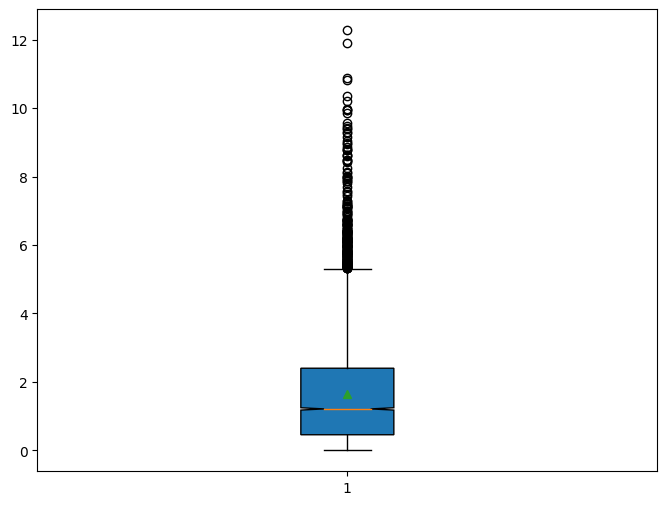

In [21]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.boxplot(payload, notch=True, vert=True, patch_artist=True, showmeans=True)

In [7]:
rt_def=np.loadtxt("../SockClient/clientrt_default.txt")
rt_wless=np.loadtxt("../SockClient/clientrt_wless.txt")
rt_noconc=np.loadtxt("../SockClient/clientrt.txt")

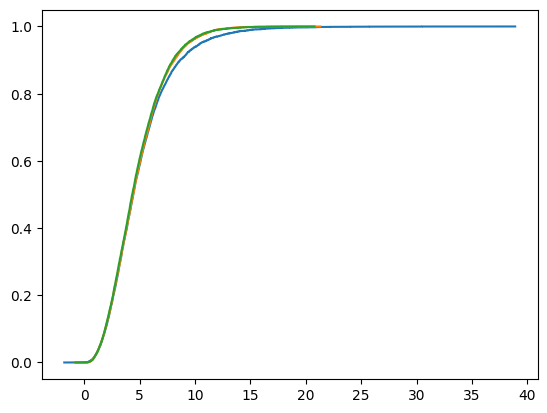

In [24]:
res_def = stats.ecdf(rt_def)
res_wless = stats.ecdf(rt_wless)
res_noconc = stats.ecdf(rt_noconc)

ax = plt.subplot()
res_def.cdf.plot(ax)
res_wless.cdf.plot(ax)
res_noconc.cdf.plot(ax)